- Time frames: 642
- Hop length = 512
- Sampling rate = 22050 Hz

$Duration= \frac{642×512}{22050} ≈14.90seconds$

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import numpy as np

h5_file = '/Users/elcachorrohumano/workspace/MusicNN/data/spectrograms.h5'

# Load the song names and convert byte strings to regular strings
with h5py.File(h5_file, 'r') as f:
    spectrograms = np.array(f['spectrograms'])
    labels = np.array(f['labels'])
    song_names = [name.decode('utf-8') for name in f['song_names']]  # Decode each name from bytes

### Label Distribution

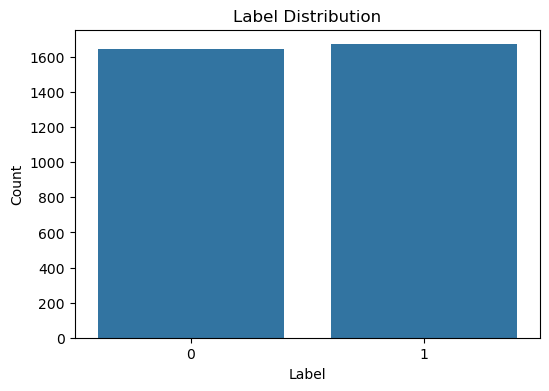

In [4]:
# Visualization of label distribution
plt.figure(figsize=(6,4))
sns.countplot(x=labels)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Spectrogram Length Distribution

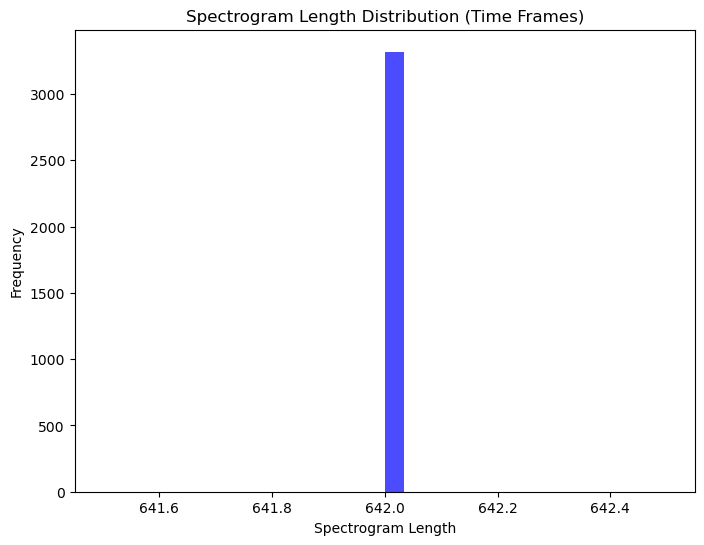

In [7]:
spectrogram_lengths = [spec.shape[1] for spec in spectrograms]
plt.figure(figsize=(8,6))
plt.hist(spectrogram_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Spectrogram Length Distribution (Time Frames)')
plt.xlabel('Spectrogram Length')
plt.ylabel('Frequency')
plt.show()

### Mean Spectrograms by Class

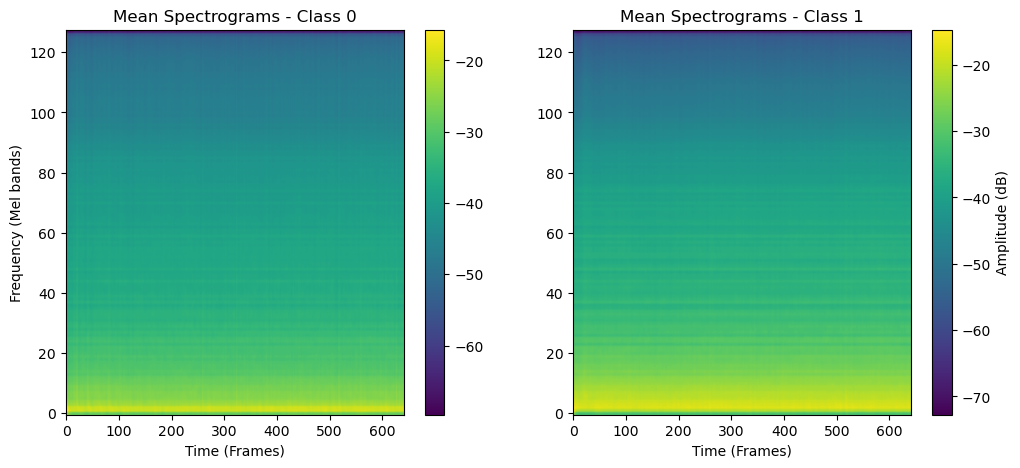

In [14]:
# Mean spectrograms for each class
mean_spectrogram_0 = np.mean([spectrograms[i] for i in range(len(labels)) if labels[i] == 0], axis=0)
mean_spectrogram_1 = np.mean([spectrograms[i] for i in range(len(labels)) if labels[i] == 1], axis=0)

# Visualization of the means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(mean_spectrogram_0, aspect='auto', origin='lower')
plt.colorbar()
plt.title('Mean Spectrograms - Class 0')
plt.xlabel('Time (Frames)')
plt.ylabel('Frequency (Mel bands)')

plt.subplot(1, 2, 2)
plt.imshow(mean_spectrogram_1, aspect='auto', origin='lower')
plt.colorbar(label='Amplitude (dB)')
plt.title('Mean Spectrograms - Class 1')
plt.xlabel('Time (Frames)')

plt.show()


### Within-Class Variability (Standard Deviation)

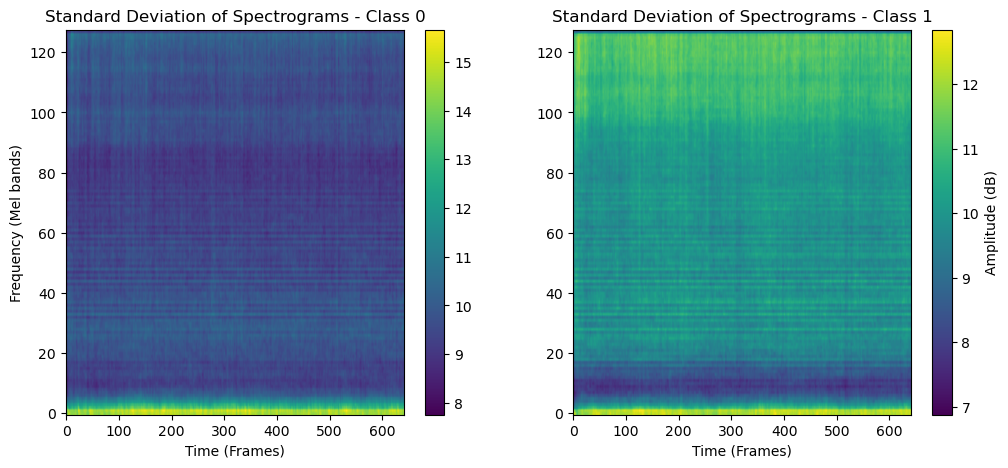

In [16]:
# Standard deviation of spectrograms for each class
std_spectrogram_0 = np.std([spectrograms[i] for i in range(len(labels)) if labels[i] == 0], axis=0)
std_spectrogram_1 = np.std([spectrograms[i] for i in range(len(labels)) if labels[i] == 1], axis=0)

# Visualization of standard deviations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(std_spectrogram_0, aspect='auto', origin='lower')
plt.colorbar()
plt.title('Standard Deviation of Spectrograms - Class 0')
plt.xlabel('Time (Frames)')
plt.ylabel('Frequency (Mel bands)')

plt.subplot(1, 2, 2)
plt.imshow(std_spectrogram_1, aspect='auto', origin='lower')
plt.colorbar(label='Amplitude (dB)')
plt.title('Standard Deviation of Spectrograms - Class 1')
plt.xlabel('Time (Frames)')

plt.show()


### Frequency Band Correlations

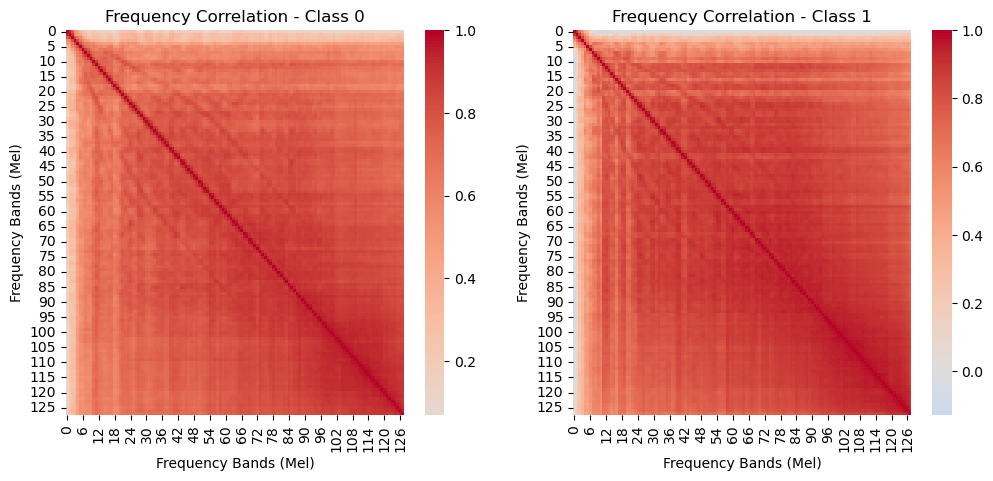

In [17]:
# Calculate correlation between frequency bands for a mean spectrogram
def spectrogram_correlation(spectrogram):
    return np.corrcoef(spectrogram)

correlation_0 = spectrogram_correlation(mean_spectrogram_0)
correlation_1 = spectrogram_correlation(mean_spectrogram_1)

# Visualization of correlation matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_0, cmap='coolwarm', center=0)
plt.title('Frequency Correlation - Class 0')
plt.xlabel('Frequency Bands (Mel)')
plt.ylabel('Frequency Bands (Mel)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_1, cmap='coolwarm', center=0)
plt.title('Frequency Correlation - Class 1')
plt.xlabel('Frequency Bands (Mel)')
plt.ylabel('Frequency Bands (Mel)')

plt.show()


### PCA

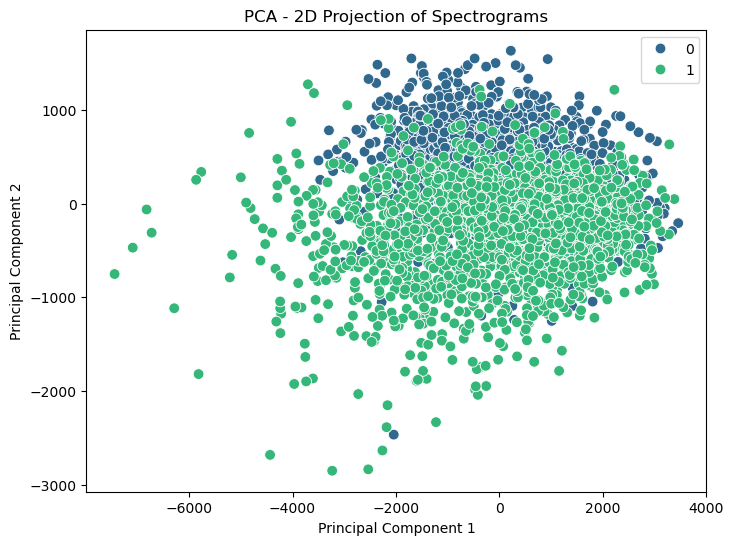

In [18]:
from sklearn.decomposition import PCA

# Flatten the spectrograms for PCA
flattened_spectrograms = [s.flatten() for s in spectrograms]

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_spectrograms)

# Visualization of PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=labels, palette='viridis', s=60)
plt.title('PCA - 2D Projection of Spectrograms')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
